<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/Carren_Exercise_Week_9_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [90]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [91]:
prop = pd.read_csv('https://raw.githubusercontent.com/CarrenP/files/refs/heads/main/property_dataset.csv')
prop.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [92]:
prop.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [93]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [94]:
prop.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [95]:
# Calculate the percentage of null values in each column
null_percentage = prop.isnull().mean() * 100

# Display the percentage of null values
null_percentage

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [96]:
# Create the SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to your DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(prop), columns=prop.columns)

# Verify the imputation
df_imputed.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [97]:
df_imputed.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [98]:
df_imputed.drop(['Nama Daerah'], axis='columns', inplace=True)
df_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [99]:
le = LabelEncoder()
df_imputed['Arah Hadap Rumah'] = le.fit_transform(df_imputed['Arah Hadap Rumah'])
df_imputed['Posisi Rumah'] = le.fit_transform(df_imputed['Posisi Rumah'])

df_imputed['Terjual/Belum'] = df_imputed['Terjual/Belum'].map({'Terjual': 0, 'Belum': 1})
df_imputed['Area Category'] = df_imputed['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
df_imputed['Lebar Jalan Depan Rumah (ROW)'] = df_imputed['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil':3})
df_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [100]:
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].str.replace(' ', '10500000000')

# Replace comma-formatted values (e.g., "10.500.000.000,00") with "10500000000"
df_imputed['Harga Penawaran (dari Owner)'] = df_imputed['Harga Penawaran (dari Owner)'].str.replace('10.500.000.000,00', '10500000000')


check the data type

In [101]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [102]:
df_imputed = df_imputed.astype({col: 'float' for col in df_imputed.select_dtypes(include='object').columns})
df_imputed = df_imputed.astype(int)

In [103]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


In [104]:
df_imputed.columns

Index(['Area Category', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran (dari Owner)', 'Terjual/Belum', 'Arah Hadap Rumah',
       'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)'],
      dtype='object')

4.

In [105]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numeric columns to scale
numeric_cols = df_imputed.select_dtypes(include=['int64']).columns

# Apply Standard Scaling
df_imputed[numeric_cols] = scaler.fit_transform(df_imputed[numeric_cols])

# Display the first few rows of the scaled DataFrame
df_imputed.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

In [106]:
# set the parameter for evaluating K
X = df_imputed[["Area Category", "Luas Tanah (m2)", "Luas Bangunan (m2)",
         "Jumlah Kamar", "Jumlah Kamar Mandi", "Tingkat/Lantai ", "Harga Penawaran (dari Owner)",
         "Terjual/Belum", "Arah Hadap Rumah", "Posisi Rumah", "Lebar Jalan Depan Rumah (ROW)"]]
sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "random", random_state = 42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

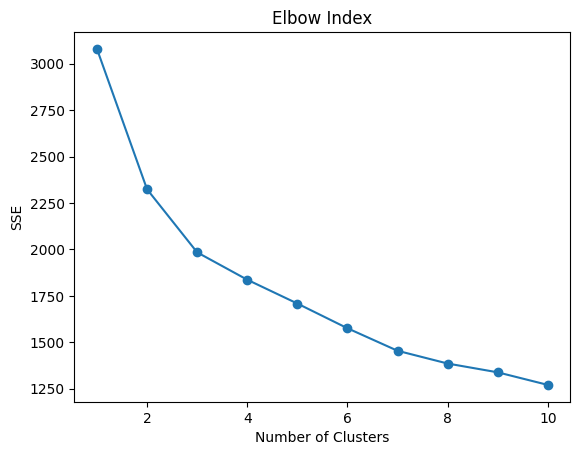

In [107]:


# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title("Elbow Index")
plt.show()

In [108]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

the best k for your model is  3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [109]:
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
kmeans.fit(df_imputed)
labels = kmeans.labels_

In [112]:
# Inverse transform numeric columns to their original scale
df_scaled_inverse = pd.DataFrame(
    scaler.inverse_transform(df_imputed[numeric_cols]),
    columns=numeric_cols,
    index=df_imputed.index
)

# Menambahkan hasil clustering ke dalam DataFrame
df_scaled_inverse['KMeans'] = kmeans.labels_

# Display the first few rows of the DataFrame
df_scaled_inverse.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [114]:
# Lakukan agregasi
cluster_summary = df_scaled_inverse.groupby('KMeans').agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)':  ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': [pd.Series.mode],
    'Arah Hadap Rumah': [pd.Series.mode],
    'Posisi Rumah': [pd.Series.mode],
    'Lebar Jalan Depan Rumah (ROW)': [pd.Series.mode]
})

# Transpose agar hasilnya menjadi vertikal (baris) dan klaster menjadi kolom
cluster_summary = cluster_summary.T

# Ubah nama klaster menjadi 'Cluster 0', 'Cluster 1', dll.
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]

# Menambahkan nama 'KMeans' pada level pertama kolom
cluster_summary.columns.name = 'KMeans'

# Menampilkan hasil
cluster_summary

KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
Arah Hadap Rumah              mode                3.0  
Posisi Rumah                  mode                2.0  
Lebar Jalan Depan Rumah (ROW) mode                2.0

In [120]:
# count data from each cluster

df_scaled_inverse['KMeans'].value_counts().sort_index()

,count
KMeans,
0,156
1,50
2,102


# write down your interpretation from the cluster that you have been made
Cluster 1 (Rumah Premium/Besar):  
Rumah dengan luas tanah dan bangunan besar, jumlah kamar lebih banyak, dan harga penawaran tinggi. Cocok untuk keluarga besar atau pembeli premium yang mencari hunian mewah di kawasan strategis. Rata-rata memiliki 2-4 lantai.

Cluster 0 (Rumah Menengah):  
Rumah dengan luas moderat, jumlah kamar mencukupi, dan harga penawaran sedang. Cocok untuk keluarga dengan anggaran menengah yang menginginkan hunian nyaman. Umumnya memiliki 2 lantai.

Cluster 2 (Rumah Terjangkau/Kecil):  
Rumah kecil dengan harga terjangkau, jumlah kamar sedikit, dan sebagian besar hanya 1 lantai. Cocok untuk keluarga kecil, pembeli pertama, atau mereka dengan anggaran terbatas.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

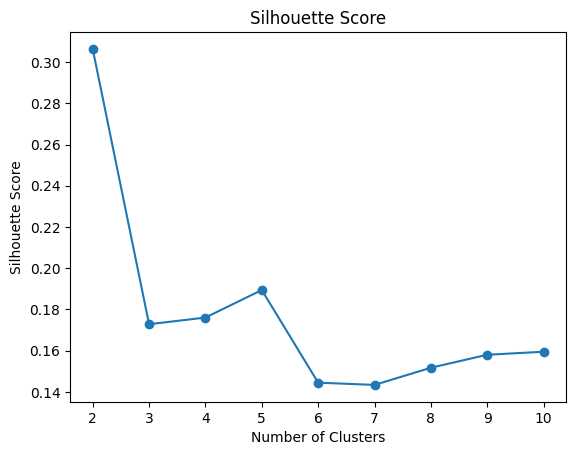

In [121]:
# The image below is not the final result, if yours looks different, that’s okay.

from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_imputed, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_imputed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()


Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [122]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # Mencoba jumlah cluster dari 2 hingga 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_imputed)  # X adalah dataset
    score = silhouette_score(df_imputed, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.2923056793296511
Jumlah Cluster: 3, Silhouette Score: 0.15212279529467007
Jumlah Cluster: 4, Silhouette Score: 0.14763506357151765
Jumlah Cluster: 5, Silhouette Score: 0.15199099108678646
Jumlah Cluster: 6, Silhouette Score: 0.1659335835095271
Jumlah Cluster: 7, Silhouette Score: 0.15982413848465304
Jumlah Cluster: 8, Silhouette Score: 0.16618482264638051
Jumlah Cluster: 9, Silhouette Score: 0.16953717503106477


In [125]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
agglo = AgglomerativeClustering(n_clusters=3)  # Angka 3 karena Silhouette Score-nya cukup tinggi sudah diatas 0.5
agglo_labels = agglo.fit_predict(df_imputed)

# Step 2: Add Agglomerative Clustering labels to the original DataFrame
df_scaled_inverse['agglo'] = agglo_labels

# show the df
df_scaled_inverse.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,1
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,0


Display the cluster summary in the form of a dataframe.

In [126]:
import numpy as np

# Function to calculate mode for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Repeat for Agglomerative Clustering
agglo_summary = df_scaled_inverse.groupby(agglo_labels).agg({
    'Area Category': [mode, 'min', 'max'],
    'Luas Tanah (m2)' : ['mean', 'min', 'max'],
    'Luas Bangunan (m2)' : ['mean', 'min', 'max'],
    'Jumlah Kamar' : [mode, 'min', 'max'],
    'Jumlah Kamar Mandi' : [mode, 'min', 'max'],
    'Tingkat/Lantai ' : [mode, 'min', 'max']
})

# Display summaries
agglo_summary = agglo_summary.rename_axis('agglo')
agglo_summary

Area Category           Luas Tanah (m2)                 \
               mode  min  max            mean    min     max   
agglo                                                          
0               2.0  1.0  4.0      511.848485  170.0  1561.0   
1               2.0  1.0  4.0      163.090361   34.0   450.0   
2               3.0  2.0  4.0      119.026316   14.0   420.0   

      Luas Bangunan (m2)                Jumlah Kamar             \
                    mean    min     max         mode  min   max   
agglo                                                             
0             572.484848  120.0  1200.0          5.0  3.0  13.0   
1             218.156627   50.0   600.0          4.0  2.0   8.0   
2             107.131579   14.0   300.0          2.0  1.0   5.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
agglo                                                          
0                    5.0  2.0  13.0             2.0  1.0  4.0  
1                    4.0  1.0   7.0             2.0  1.0  3.0  
2                    1.0  1.0   4.0             1.0  1.0  2.0

In [128]:

import numpy as np

# Function to calculate mode for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Repeat for Agglomerative Clustering
agglo_summary = df_scaled_inverse.groupby(agglo_labels).agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': mode,
    'Arah Hadap Rumah': mode,
    'Posisi Rumah': mode,
    'Lebar Jalan Depan Rumah (ROW)': mode
})

# Display summaries
agglo_summary = agglo_summary.rename_axis('agglo')
agglo_summary

Harga Penawaran (dari Owner)                            Terjual/Belum  \
                              mean          min           max          mode   
agglo                                                                         
0                     1.383303e+10  325000000.0  9.900000e+10           1.0   
1                     3.094804e+09  645000000.0  1.450000e+10           1.0   
2                     1.548517e+09  160000000.0  1.050000e+10           1.0   

      Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah (ROW)  
                  mode         mode                          mode  
agglo                                                              
0                  3.0          2.0                           2.0  
1                  3.0          2.0                           2.0  
2                  3.0          2.0                           2.0

In [129]:
cluster_counts = df_scaled_inverse['agglo'].value_counts().sort_index()
cluster_counts

,count
agglo,
0,66
1,166
2,76


write down your interpretation from the cluster that you have been made

Cluster 0 (Rumah Mewah)  
Rumah dengan tanah dan bangunan luas, banyak kamar, dan harga tinggi. Cocok untuk keluarga besar di kawasan elit. Sebagian besar memiliki 2 lantai. Jumlah unit sangat terbatas, hanya 4 rumah.  

Cluster 1 (Rumah Tingkat Menengah)  
Rumah berukuran sedang dengan harga moderat, cocok untuk keluarga standar. Sebagian besar memiliki 2 lantai. Terdiri dari 51 unit, memenuhi kebutuhan pasar menengah.  

Cluster 2 (Rumah Terjangkau)  
Rumah kecil dengan harga rendah, cocok untuk keluarga kecil atau pembeli pertama. Sebagian besar memiliki 1 lantai. Terdiri dari 253 unit, menyasar segmen pasar ekonomis.  

**Hierarchical Visualization**

Single Linkage

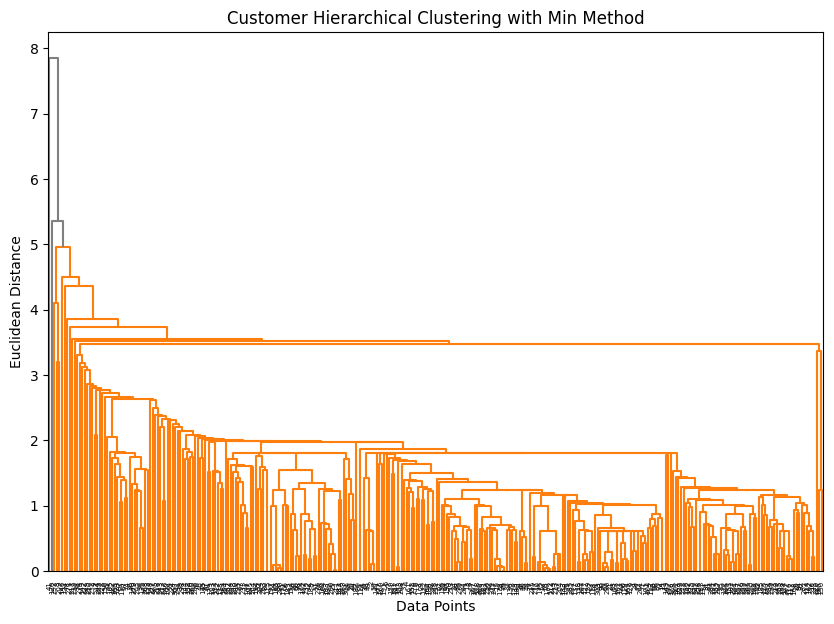

In [133]:
# Min Distance
# Buat linkage matrix
linked = linkage(df_imputed, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 3

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='grey',     # Warna cabang di atas threshold
           labels=np.arange(1, prop.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with Min Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

complete linkage

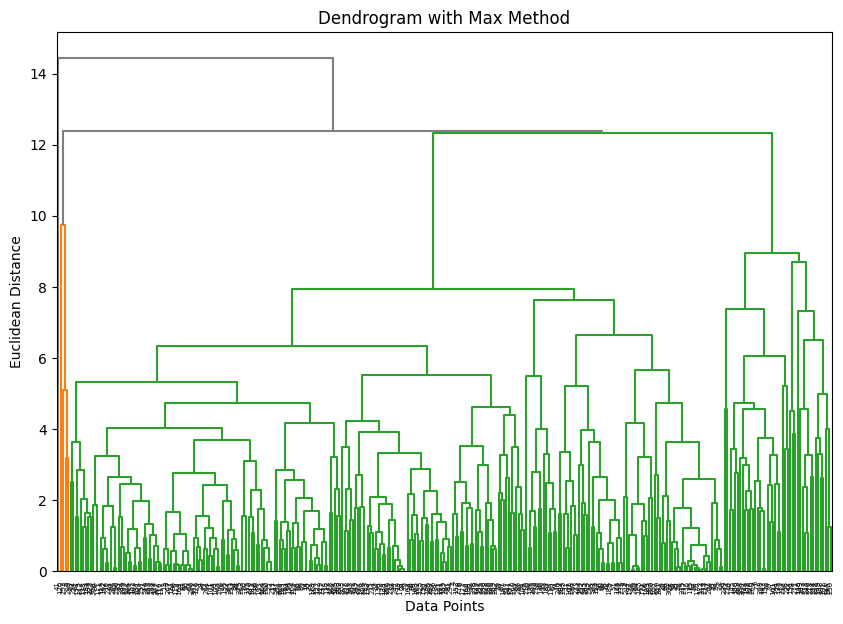

In [138]:
# Max Distance
n_clusters = 3
linked = linkage(df_imputed, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, prop.shape[0] + 1))
plt.title("Dendrogram with Max Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

average linkage

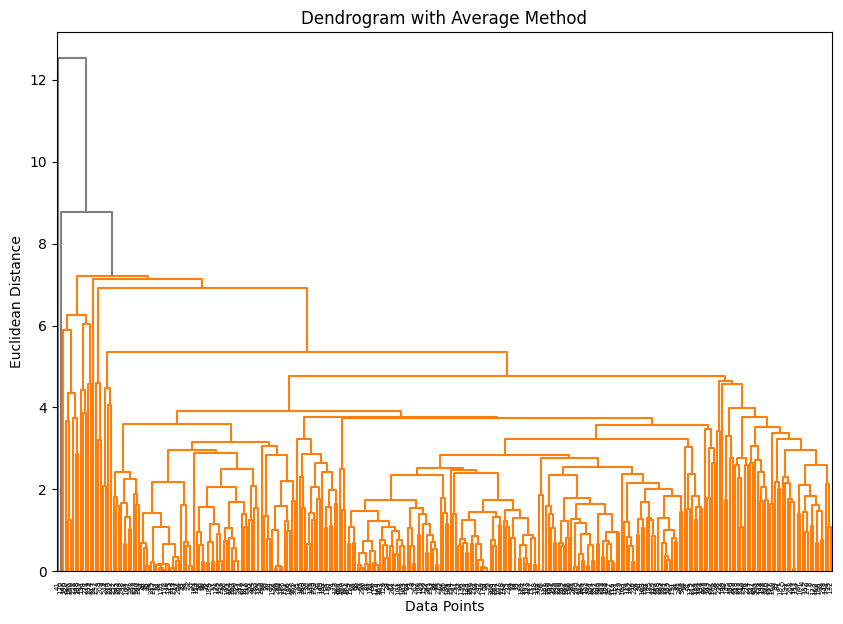

In [139]:

# Average Distance
n_clusters = 3
linked = linkage(df_imputed, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, prop.shape[0] + 1))
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

ward method

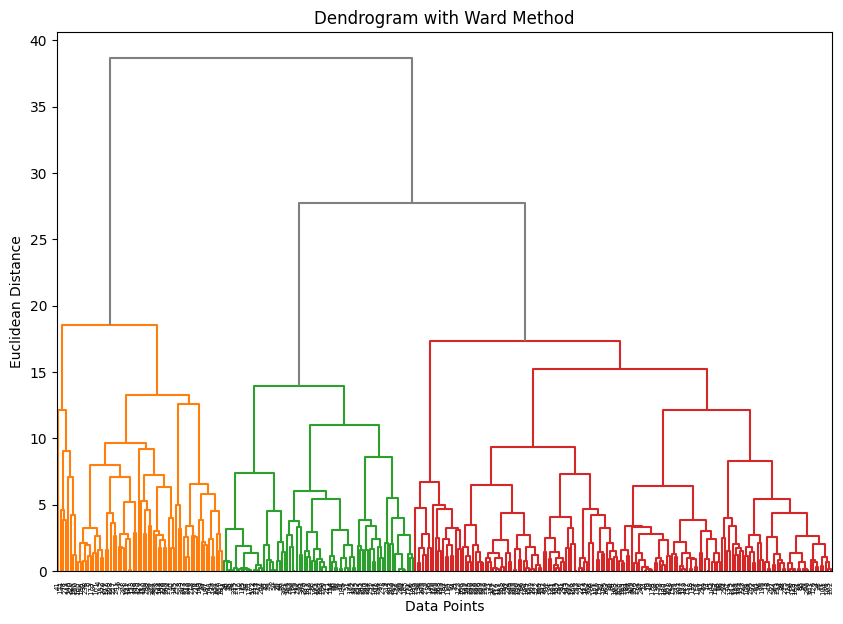

In [144]:

# Ward Method
n_clusters = 3
linked = linkage(df_imputed, method='ward', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, prop.shape[0] + 1))
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()